# Matplotlib

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

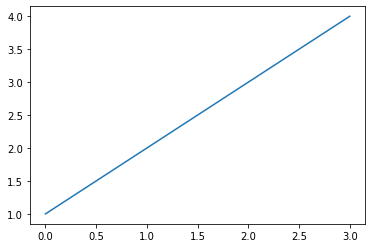

In [3]:
# Ex1)
import matplotlib.pyplot as plt

plt.plot([1,2,3,4]) # plot함수는 리스트의 값들이 y값이라 가정하고, x의 값을 0부터 자동 생성
plt.show()

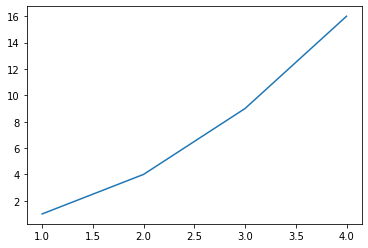

In [4]:
# Ex2)
plt.plot([1,2,3,4], [1,4,9,16]) # [1,2,3,4] = x축, [1,4,9,16] = y축
plt.show();

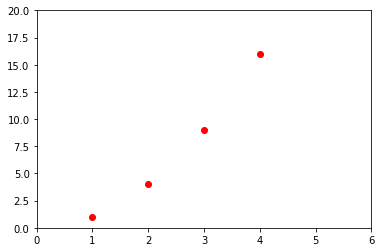

In [5]:
# Ex3) Style 지정
plt.plot([1,2,3,4], [1,4,9,16], 'ro') # 'ro' = 포맷 문자열. 위치 : 세번째 인자, 역할 : x,y 값 인자에 대해 선의 색상과 형태 지정
# 'ro' = red의 o(원형) 마커
plt.axis([0,6,0,20]) # axis([xmin, xmax, ymin, ymax])
plt.show()

# Introduction

In [6]:
!pip install yfinance

You should consider upgrading via the 'A:\Python\python.exe -m pip install --upgrade pip' command.


> 오픈소스 API  
>  
> 이를 통해 Yahoo Finance에서 제공하는 데이터에 접근 가능  
>  
> Yahoo Finance는 주식 시세, 보도 자료, 재무 보고서 등을 포함한 자료를 가지고 있음
>  
> Yahoo Finance에서 가져온 자료는 DataFrame형태

## First Example : Handling Financial Data

In [7]:
import yfinance as yf
import datetime as dt

tickerSymbol = 'MSFT' # tickerSymbol이라는 변수에 MSFT를 저장

tickerData = yf.Ticker(tickerSymbol)
# yfinance에서 MSFT(MicroSoft)에 대한 정보를 가져옴

today = dt.date.today()

tickerDf = tickerData.history(period='1d', start='2016-1-1', end=today)
# tickerData에 저장된 자료의 과거를 1일 단위로 2016년 1월 1일부터 오늘날까지 정보를 가져와라
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-12-31,50.490955,50.626100,49.932344,49.986404,27334100,0.00,0
2016-01-04,48.941263,49.373734,48.103351,49.373734,53778000,0.00,0
2016-01-05,49.490859,49.905310,49.139478,49.598976,34079700,0.00,0
2016-01-06,48.941263,49.013343,48.328596,48.697998,39518900,0.00,0
2016-01-07,47.481680,48.193456,46.914061,47.004158,56564900,0.00,0
...,...,...,...,...,...,...,...
2022-05-12,257.091212,259.276125,249.439036,254.756653,51033800,0.00,0
2022-05-13,256.752016,262.428797,254.756663,260.513245,34893400,0.00,0
2022-05-16,259.355934,265.202334,255.185655,260.892365,32550900,0.00,0


In [8]:
tickerDf['MA10'] = tickerDf['Close'].rolling(10).mean();
# < 좌변 >
# tickerDf에 MA10이라는 열을 추가하고, 우변의 내용을 저장
# < 우변 >
# tickerDf에 존재하는 Close 열에 접근하고, 10일에 대한 평균 이동을 구함.
# 그 평균 이동 내역의 평균값을 DataFrame에 저장
# rolling(N)
# N은 윈도우의 크기인데, 윈도우라는 것이 비교 대상인 것 같음.
# tickerDf는 period가 1일이라서, 10을하면 10일 이동평균선이 되는 것임.
# 지정한 N보다 데이터가 적으면 NaN 반환
tickerDf['MA50'] = tickerDf['Close'].rolling(50).mean();
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA10,MA50
Date,,,,,,,,,
2015-12-31,50.490955,50.626100,49.932344,49.986404,27334100,0.0,0,NaN,NaN
2016-01-04,48.941263,49.373734,48.103351,49.373734,53778000,0.0,0,NaN,NaN
2016-01-05,49.490859,49.905310,49.139478,49.598976,34079700,0.0,0,NaN,NaN
2016-01-06,48.941263,49.013343,48.328596,48.697998,39518900,0.0,0,NaN,NaN
2016-01-07,47.481680,48.193456,46.914061,47.004158,56564900,0.0,0,NaN,NaN


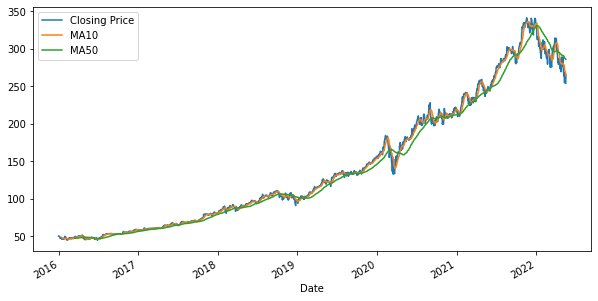

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5)) # figsize = 그래프 크기
tickerDf['Close'].plot(label='Closing Price');
tickerDf['MA10'].plot(label='MA10'); # plot = 점 찍기
tickerDf['MA50'].plot(label='MA50');
plt.legend(); # 범례

## Second Example : Reading Books Fast!

In [10]:
from datascience import *
from urllib.request import urlopen
import re # 정규포현식 모듈
def read_url(url):
    return re.sub('\\s+',' ', urlopen(url).read().decode())

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url) # 위에서 저장한 url 내용을 선언한 함수를 통해 새로운 변수에 저장
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:] # 44번쨰 Chapter라는 글자가 나오는 곳 부터 시작

Table().with_columns('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


In [11]:
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]
Table().with_columns('Chapters ', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


## How to make code that are often appear?

In [12]:
from datascience import *
import numpy as np
counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters,'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])
print(counts)

Jim  | Tom  | Huck
0    | 6    | 3
16   | 24   | 2
0    | 5    | 2
8    | 0    | 1
0    | 0    | 0
0    | 0    | 2
0    | 2    | 0
22   | 2    | 5
11   | 0    | 1
19   | 0    | 0
... (33 rows omitted)


In [13]:
# 적용연습
#count_wch = Table().with_columns([
#        'Search Target Label ', np.char.count(little_women_chapters,'Search Target Name ')
#    ])
#print(count_wch)

Jim  | Tom  | Huck | Chapter
0    | 6    | 3    | 1
16   | 30   | 5    | 2
16   | 35   | 7    | 3
24   | 35   | 8    | 4
24   | 35   | 8    | 5
24   | 35   | 10   | 6
24   | 37   | 10   | 7
46   | 39   | 15   | 8
57   | 39   | 16   | 9
76   | 39   | 16   | 10
... (33 rows omitted)


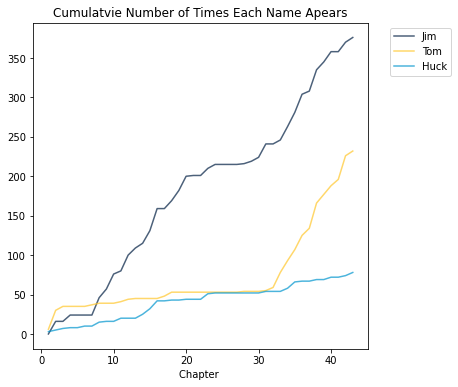

In [14]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning) # error 무시

cum_counts = counts.cumsum().with_columns('Chapter ', np.arange(1, 44, 1)) # cumsum = 누적합
print(cum_counts)
cum_counts.plot(column_for_xticks=3)
plt.title('Cumulatvie Number of Times Each Name Apears');

#### cumsum 이해하기

In [15]:
a = np.arange(1,11).reshape(5,2)
print(a)
print(a.sum())
print(a.cumsum()) # 더하는 과정을 보여줌

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
55
[ 1  3  6 10 15 21 28 36 45 55]


In [16]:
counts_lw = Table().with_columns([
            'Amy', np.char.count(little_women_chapters, 'Amy'),
            'Beth', np.char.count(little_women_chapters, 'Beth'),
            'Jo', np.char.count(little_women_chapters, 'Jo'),
            'Meg', np.char.count(little_women_chapters, 'Meg'),
            'Laurie', np.char.count(little_women_chapters, 'Laurie')
])
counts_lw

Amy,Beth,Jo,Meg,Laurie
23,26,44,26,0
13,12,21,20,0
2,2,62,36,16
14,18,34,17,0
6,14,55,13,35
6,28,13,5,9
27,5,9,5,7
48,9,71,16,17
3,5,21,71,24
5,5,12,4,4


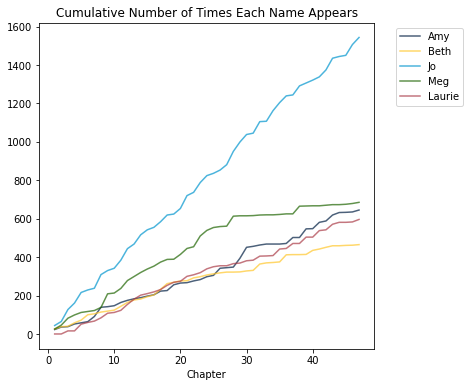

In [17]:
cum_counts_lw = counts_lw.cumsum().with_column('Chapter', np.arange(1,48,1))
cum_counts_lw.plot(column_for_xticks=5)
plt.title('Cumulative Number of Times Each Name Appears');

## Chapter 길이와 문장수 관계

In [18]:
# In each chapter, count the number of all characters
# 각 챕터에서, 모든 캐릭터들의 수 세기
# call this the "length" of the chapter
# 이를 "챕터의 길이"라고 한다.
# Also count the number of periods.
# 또한, 문장의 수도 센다.
chars_periods_huck_finn = Table().with_columns([
    'Huck Finn Chpater Length', [len(s) for s in huck_finn_chapters],
    'Number of Periods', np.char.count(huck_finn_chapters, '.')
])
chars_periods_huck_finn

Huck Finn Chpater Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [19]:
chars_periods_little_women = Table().with_columns([
    'Little Women Chapter Length', [len(s) for s in little_women_chapters],
    'Number of Periods', np.char.count(little_women_chapters, '.')
])
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


Text(0, 0.5, 'Number of Characters in Chapter')

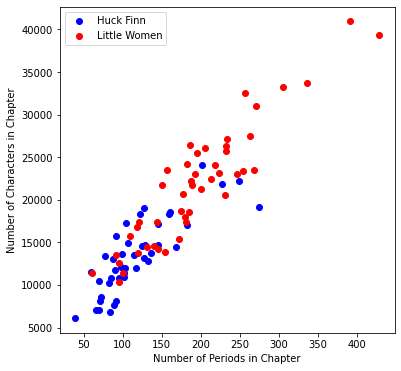

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(chars_periods_huck_finn.column(1),
             chars_periods_huck_finn.column(0),
             color='blue', label='Huck Finn')
plt.scatter(chars_periods_little_women.column(1),
             chars_periods_little_women.column(0),
             color='red', label='Little Women')

plt.legend()
plt.xlabel('Number of Periods in Chapter')
plt.ylabel('Number of Characters in Chapter')

# Ch9. Randomness

In [21]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

In [22]:
def other_one(x, a_b):
    
    """Compare x with the two elements of a_b;
    if it is equal to one of them, return the other one;
    if it is not equal to either of them, return an error message.
    """
    if x == a_b.item(0): # 첫번째 원소와 같다면
        return a_b.item(1) # 두번째 원소를 반환
    
    elif x == a_b.item(1): # 두번째 원소와 같다면
        return a_b.item(0) # 첫번째 원소 반환
    
    else:
        return 'The input is not valid.'

In [23]:
#Ex otehr_one function
colors = make_array('red','blue')
other_one('red', colors) # blue가 반환됨을 알 수 있음

'blue'

In [24]:
# 동전 던지기
coin = make_array('Heads', 'Tails')
outcomes = make_array()

for i in np.arange(5):
    outcome_of_toss = np.random.choice(coin) # 동전 던진 결과 선택
    outcomes = np.append(outcomes, outcome_of_toss) # 결과를 저장

outcomes # 결과 출력

array(['Heads', 'Heads', 'Heads', 'Tails', 'Tails'], dtype='<U32')

In [25]:
another_outcomes = np.random.choice(coin, 5) # 동전 던지는 횟수 지정(5번)
another_outcomes

array(['Tails', 'Tails', 'Tails', 'Heads', 'Tails'], dtype='<U5')

In [26]:
num = np.arange(1,46)

## 9 - Ex1) The Monty Hall Problem

# Ch2. Casuality and Experiments

 - Casuality = 인과관계(Cause and Effect)
 - 두 단계의 분석이 일반적으로 필요
    - Association : treatment(변수,factor)과 outcome(결과, effect) 사이에 상관성 존재
    - Casuality : 그러한 상관성에 인과관계가 존재

# Ch3. Sequences

### In datascience module..
 - make_array : 배열 생성
    - array는 수식에 사용 가능하며 벡터 연산 효율적

In [1]:
from datascience import *
english_parts_of_speech = make_array("noun", "pronoun", "verb", "adverb", "adjective", "conjunction", "preposition", "interjection")
english_parts_of_speech

array(['noun', 'pronoun', 'verb', 'adverb', 'adjective', 'conjunction',
       'preposition', 'interjection'], dtype='<U12')

In [2]:
baseline_high = 14.48
highs = make_array(baseline_high - 0.880, baseline_high - 0.093,
                   baseline_high + 0.105, baseline_high + 0.684)
highs

array([13.6  , 14.387, 14.585, 15.164])

### numpy function / method

#### Input : array, Output : single value

|Function|Description|
--|--
| np.prod | Multiply all elements together |
| np.sum  | Add all elements together |
| np.all  | Test whether all elements are true values (non-zero numbers are true) |
| np.any  | Test whether any elements are true values (non-zero numbers are true) |
| np.count_nonzero  | Count the number of non-zero elements |

In [3]:
import numpy as np
np_prod = np.prod(highs) # 원소들의 곱
np_sum = np.sum(highs) # 원소들의 합
np_all = np.all(highs) # 모든 원소가 참인가
np_any = np.any(highs) # 참인 원소가 단 하나라도 존재하는가
np_count_nonzero = np.count_nonzero(english_parts_of_speech) # 거짓이 아닌 값의 개수
print("np.prod : ", np_prod)
print("\nnp.sum : ", np_sum)
print("\nnp.all : ", np_all)
print("\nnp.any : ", np_any)
print("\nnp.count_nonzero : ", np_count_nonzero)
# count_nonzero를 제외하고 모두 문자열 배열에는 사용 불가

np.prod :  43274.231214608

np.sum :  57.736000000000004

np.all :  True

np.any :  True

np.count_nonzero :  8


#### Input : array, Output : array

|Function|Description|
--|--
| np.diff   | Difference between adjacent elements |
| np.round  | Round each number to the nearest integer (whole number) |
| np.cumprod  | A cumulative product: for each element, multiply all elements so far  |
| np.exp  | Exponentiate each element |
| np.log  | Take the natural logarithm of each element |
| np.sqrt  | Take the square root of each element |
| np.sort  | Sort the elements |

In [4]:
np_diff = np.diff(highs)
np_round = np.round(highs,2)
np_cumprod = np.cumprod(highs)
np_exp = np.exp(highs)
np_log = np.log(highs)
np_sqrt = np.sqrt(highs)
np_sort = np.sort(highs)
np_round2 = highs.round(2)
np_cumprod2 = highs.cumprod()
np_sort2 = highs.sort()
print("Original")
print(highs,"\n")
print("np.diff(highs) : ", np_diff)
print("\nnp.round(highs,2) : ", np_round)
print("\nnp.cumprod(highs) : ", np_cumprod)
print("\nnp.exp(highs) : ", np_exp)
print("\nnp.log(highs) : ", np_log)
print("\nnp.sqrt(highs) : ", np_sqrt)
print("\nnp.sort(highs) : ", np_sort)
print("\nThe other way")
print("\nhighs.round(2) : ", np_round2)
print("\nhighs.cumprod() : ", np_cumprod2)
print("\nhighs.sort() : ", np_sort2)

Original
[13.6   14.387 14.585 15.164] 

np.diff(highs) :  [0.787 0.198 0.579]

np.round(highs,2) :  [13.6  14.39 14.58 15.16]

np.cumprod(highs) :  [1.36000000e+01 1.95663200e+02 2.85374777e+03 4.32742312e+04]

np.exp(highs) :  [ 806129.75912399 1770902.74507973 2158663.8493677  3851603.06453344]

np.log(highs) :  [2.61006979 2.66632502 2.6799936  2.7189242 ]

np.sqrt(highs) :  [3.68781778 3.79301991 3.81903129 3.8940981 ]

np.sort(highs) :  [13.6   14.387 14.585 15.164]

The other way

highs.round(2) :  [13.6  14.39 14.58 15.16]

highs.cumprod() :  [1.36000000e+01 1.95663200e+02 2.85374777e+03 4.32742312e+04]

highs.sort() :  None


#### Input : string(문자 array), Output : array

|Function|Description|
--|--
| np.char.lower   | Lowercase each element |
|  np.char.upper   | Uppercase each element |
| np.char.strip   |Remove spaces at the beginning or end of each element  |
|  np.char.isalpha    | Whether each element is only letters (no numbers or symbols) |
|  np.char.isnumeric  | Whether each element is only numeric (no letters) |

In [11]:
test_str = make_array('a','q','w','a 1','1', 'q', 'a2','q','3','aab')
print("Original Data")
print(test_str)
print("\nnp.char.upper : ", np.char.upper(test_str))
print("\nnp.char.lower : ", np.char.lower(test_str))
print("\nnp.char.strip : ", np.char.strip(test_str, 'a'))
print("\nnp.char.isalpha : ", np.char.isalpha(test_str))
print("\nnp.char.isnumeric : ", np.char.isnumeric(test_str))

Original Data
['a' 'q' 'w' 'a 1' '1' 'q' 'a2' 'q' '3' 'aab']

np.char.upper :  ['A' 'Q' 'W' 'A 1' '1' 'Q' 'A2' 'Q' '3' 'AAB']

np.char.lower :  ['a' 'q' 'w' 'a 1' '1' 'q' 'a2' 'q' '3' 'aab']

np.char.strip :  ['' 'q' 'w' ' 1' '1' 'q' '2' 'q' '3' 'b']

np.char.isalpha :  [ True  True  True False False  True False  True False  True]

np.char.isnumeric :  [False False False False  True False False False  True False]


#### Inputs : String and which want to search, Outputs : array
|Function|Description|
--|--
|  np.char.count    | Count the number of times a search string appears among the elements of an array |
|  np.char.find    | The position within each element that a search string is found first |
|  np.char.rfind   | The position within each element that a search string is found last  |
|  np.char.startswith     | Whether each element starts with the search string |

In [41]:
print("Original Data")
print(test_str)
print("np.char.count(test_str, 'a') : ", np.char.count(test_str, 'a'))
print("\nnp.char.find(test_str, 'a') : ", np.char.find(test_str, 'a'))
print("\nnp.char.rfind(test_str, 'a') : ", np.char.rfind(test_str, 'a'))
print("\nnp.char.startwith(test_str, 'a') : ", np.char.startswith(test_str, 'a'))


Original Data
['a' 'q' 'w' 'a1' '1' 'q' 'a2' 'q' '3' 'aab']
np.char.count(test_str, 'a') :  [1 0 0 1 0 0 1 0 0 2]

np.char.find(test_str, 'a') :  [ 0 -1 -1  0 -1 -1  0 -1 -1  0]

np.char.rfind(test_str, 'a') :  [ 0 -1 -1  0 -1 -1  0 -1 -1  1]

np.char.startwith(test_str, 'a') :  [ True False False  True False False  True False False  True]


#### Range
- Make array that increas or decrease number array.
- interval 표시하는데 사용(Using for mark up the interval)
- np.arange() 형태로 사용
- np.arange(start, end, step)
- Caution!! Include Start, but not end.

In [42]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [43]:
np.arange(3,9)

array([3, 4, 5, 6, 7, 8])

In [44]:
np.arange(3,30,5)

array([ 3,  8, 13, 18, 23, 28])

In [46]:
np.arange(1.5, -2, -0.5)

array([ 1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5])

# Ch6. Tables

In [12]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

### Create Table from Data

In [13]:
cones = Table.read_table(fpath+'cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


#### Info

> row(=6 at above table) : individuals(각각의)      
> colum(= 3 at above table) : attributes(특성)      
> table_name.method_name(argumets)  

In [14]:
nba = Table.read_table(fpath+'nba_salaries.csv').relabeled(3,'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


### Table method

#### Print Table

In [15]:
cones.show()

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [16]:
cones.show(2)

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75


#### Select Column

- select()
- drop()
- column() or indexing by using label --> This return array type

> Above all method can't affect Original Data(위의 method는 원본에 영향 X)

##### Select

> select는 arguments로 column_name을 받으며, original data에서 받은 column만 출력

In [17]:
cones.select('Flavor')

Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


In [18]:
cones.select('Flavor', 'Price')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


##### column

>array를 return 하기 때문에, column(column_name)과 column[column_name] 모두 사용 가능

In [19]:
cones.column('Flavor')

array(['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate',
       'bubblegum'], dtype='<U10')

In [20]:
cones['Flavor']

array(['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate',
       'bubblegum'], dtype='<U10')

##### drop

> drop(a) = a column을 제외하고 출력(여러 column 선택 가능)

In [22]:
cones.drop('Color', 'Price')

Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


#### Add Column

- with_column() or with_columns()

In [23]:
cones.with_columns(
    'Star', [3,4,4,5,3,2],
    'Size',['L','R','S','L','R','S']
)

Flavor,Color,Price,Star,Size
strawberry,pink,3.55,3,L
chocolate,light brown,4.75,4,R
chocolate,dark brown,5.25,4,S
strawberry,pink,5.25,5,L
chocolate,dark brown,5.25,3,R
bubblegum,pink,4.75,2,S


In [24]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


#### Select Row

- Use index : take()
- Use condition(조건식을 통해 선택) : where()

##### take()

- np.arange()를 argument로 사용함으로써 여러개 지정도 가능

In [26]:
nba.show(7)

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333


In [27]:
nba.take(0)

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


In [28]:
# 범위를 지정 - argument에 range 사용
nba.take(np.arange(3,6))

PLAYER,POSITION,TEAM,SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4


##### where()

> where(column_name, row name which you want to search)

In [29]:
cones.where('Flavor', 'chocolate')

Flavor,Color,Price
chocolate,light brown,4.75
chocolate,dark brown,5.25
chocolate,dark brown,5.25


In [31]:
nba.where('PLAYER', 'Stephen Curry')

PLAYER,POSITION,TEAM,SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


In [32]:
warriors = nba.where('TEAM', 'Golden State Warriors')
warriors.show()

PLAYER,POSITION,TEAM,SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


#### Sorting Row data

- descending=True : 내림차순
- descending=False : 오름차순(Default)

In [33]:
cones.sort('Price')

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
bubblegum,pink,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25


In [35]:
cones.sort('Price', descending=True)

Flavor,Color,Price
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
chocolate,light brown,4.75
bubblegum,pink,4.75
strawberry,pink,3.55


In [37]:
# 문자열 정렬 가능
cones.sort('Flavor')

Flavor,Color,Price
bubblegum,pink,4.75
chocolate,light brown,4.75
chocolate,dark brown,5.25
chocolate,dark brown,5.25
strawberry,pink,3.55
strawberry,pink,5.25


In [38]:
# nba 연봉순 출력
nba.sort('SALARY', descending=True)

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


In [40]:
# Player 이름 순 정렬 후 상위 5명 - Using show()
nba.sort('PLAYER').show(5)

PLAYER,POSITION,TEAM,SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12


In [41]:
# Player 이름 순 정렬 후 상위 5명 - Using take()
nba.sort('PLAYER').take(np.arange(5))

PLAYER,POSITION,TEAM,SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12


In [42]:
# 연봉 상위 5명 출력
nba.sort('SALARY', descending=True).show(5)

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594


In [43]:
# 연봉 상위 5명만 Table로 만들기
top5 = nba.sort('SALARY', descending=True).take(np.arange(5))
top5

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
